# PyKEEN Tutorial

This tutorial will guide you through the process of using PyKEEN for knowledge graph embedding. We will cover the following topics:

1. Data Preparation
2. Creating SPO triples
3. Setting up Models
4. Evaluations

Before we start, make sure you have installed the PyKEEN library. If not, you can install it by running `!pip install pykeen` in a code cell.

## 1. Data Preparation

In this section, we will load and prepare our data. The data should be in a TSV (Tab-Separated Values) format. We will use pandas to load the data and prepare it for PyKEEN.

In [133]:
import pandas as pd

# Define the subjects, predicates, and objects
subjects = ['Alice', 'Alice', 'Alice', 'Bob', 'Bob', 'Charlie', 'Charlie', 'David', 'David', 'Eve']
predicates = ['likes', 'knows', 'has', 'likes', 'has', 'knows', 'likes', 'has', 'knows', 'likes']
objects = ['Bob', 'Eve', 'Cat', 'Alice', 'Dog', 'Alice', 'Eve', 'Fish', 'Bob', 'Fish']

# Create a dataframe
df = pd.DataFrame({'subject': subjects, 'predicate': predicates, 'object': objects})

# Save the dataframe to a TSV file
df.to_csv('dataset10.tsv', sep='\t', index=False)

df

,subject,predicate,object
0,Alice,likes,Bob
1,Alice,knows,Eve
2,Alice,has,Cat
3,Bob,likes,Alice
4,Bob,has,Dog
5,Charlie,knows,Alice
6,Charlie,likes,Eve
7,David,has,Fish
8,David,knows,Bob
9,Eve,likes,Fish


In [146]:
subjects = ['Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Bob', 'Bob', 'Bob', 'Bob', 'Bob', 'Bob', 'Charlie', 'Charlie', 'Charlie', 'Charlie', 'Charlie', 'Charlie', 'David', 'David', 'David', 'David', 'David', 'David', 'Eve', 'Eve', 'Eve', 'Eve', 'Eve', 'Eve']
predicates = ['friend_with', 'friend_with', 'has_hobby', 'has_hobby', 'has_occupation', 'has_occupation', 'friend_with', 'friend_with', 'has_hobby', 'has_hobby', 'has_occupation', 'has_occupation', 'friend_with', 'friend_with', 'has_hobby', 'has_hobby', 'has_occupation', 'has_occupation', 'friend_with', 'friend_with', 'has_hobby', 'has_hobby', 'has_occupation', 'has_occupation', 'friend_with', 'friend_with', 'has_hobby', 'has_hobby', 'has_occupation', 'has_occupation']
objects = ['Bob', 'Charlie', 'Reading', 'Swimming', 'Engineer', 'Scientist', 'Alice', 'David', 'Football', 'Cycling', 'Doctor', 'Chef', 'Alice', 'Eve', 'Gaming', 'Photography', 'Teacher', 'Lawyer', 'Bob', 'Frank', 'Swimming', 'Hiking', 'Lawyer', 'Pilot', 'Charlie', 'Frank', 'Painting', 'Running', 'Chef', 'Nurse']


df = pd.DataFrame({'subject': subjects, 'predicate': predicates, 'object': objects})
df.to_csv('dataset30.tsv', sep='\t', index=False)
df

,subject,predicate,object
0,Alice,friend_with,Bob
1,Alice,friend_with,Charlie
2,Alice,has_hobby,Reading
3,Alice,has_hobby,Swimming
4,Alice,has_occupation,Engineer
5,Alice,has_occupation,Scientist
6,Bob,friend_with,Alice
7,Bob,friend_with,David
8,Bob,has_hobby,Football
9,Bob,has_hobby,Cycling


## 2. Creating SPO triples

Once we have our data loaded, we need to create SPO (Subject-Predicate-Object) triples. These triples represent the relationships between entities in our knowledge graph. In PyKEEN, we can use the `TriplesFactory` class to create these triples.

In [147]:
from pykeen.triples import TriplesFactory

# Assuming your dataframe has columns 'subject', 'predicate', 'object'
triples_factory = TriplesFactory.from_labeled_triples(
    triples=df[['subject', 'predicate', 'object']].values,
)

# Display the first few triples
triples_factory.triples

array([['Alice', 'friend_with', 'Bob'],
       ['Alice', 'friend_with', 'Charlie'],
       ['Alice', 'has_hobby', 'Reading'],
       ['Alice', 'has_hobby', 'Swimming'],
       ['Alice', 'has_occupation', 'Engineer'],
       ['Alice', 'has_occupation', 'Scientist'],
       ['Bob', 'friend_with', 'Alice'],
       ['Bob', 'friend_with', 'David'],
       ['Bob', 'has_hobby', 'Cycling'],
       ['Bob', 'has_hobby', 'Football'],
       ['Bob', 'has_occupation', 'Chef'],
       ['Bob', 'has_occupation', 'Doctor'],
       ['Charlie', 'friend_with', 'Alice'],
       ['Charlie', 'friend_with', 'Eve'],
       ['Charlie', 'has_hobby', 'Gaming'],
       ['Charlie', 'has_hobby', 'Photography'],
       ['Charlie', 'has_occupation', 'Lawyer'],
       ['Charlie', 'has_occupation', 'Teacher'],
       ['David', 'friend_with', 'Bob'],
       ['David', 'friend_with', 'Frank'],
       ['David', 'has_hobby', 'Hiking'],
       ['David', 'has_hobby', 'Swimming'],
       ['David', 'has_occupation', 'Lawyer'],
 

In [149]:
# training, validation, testing = triples_factory.split(ratios=(.6, .2, .2))
training = triples_factory
validation = triples_factory
testing = triples_factory
d=training

In [150]:
d.entity_to_id

{'Alice': 0,
 'Bob': 1,
 'Charlie': 2,
 'Chef': 3,
 'Cycling': 4,
 'David': 5,
 'Doctor': 6,
 'Engineer': 7,
 'Eve': 8,
 'Football': 9,
 'Frank': 10,
 'Gaming': 11,
 'Hiking': 12,
 'Lawyer': 13,
 'Nurse': 14,
 'Painting': 15,
 'Photography': 16,
 'Pilot': 17,
 'Reading': 18,
 'Running': 19,
 'Scientist': 20,
 'Swimming': 21,
 'Teacher': 22}

In [151]:
d.relation_to_id

{'friend_with': 0, 'has_hobby': 1, 'has_occupation': 2}

In [152]:
d.map_triples(d.triples)

tensor([[ 0,  0,  1],
        [ 0,  0,  2],
        [ 0,  1, 18],
        [ 0,  1, 21],
        [ 0,  2,  7],
        [ 0,  2, 20],
        [ 1,  0,  0],
        [ 1,  0,  5],
        [ 1,  1,  4],
        [ 1,  1,  9],
        [ 1,  2,  3],
        [ 1,  2,  6],
        [ 2,  0,  0],
        [ 2,  0,  8],
        [ 2,  1, 11],
        [ 2,  1, 16],
        [ 2,  2, 13],
        [ 2,  2, 22],
        [ 5,  0,  1],
        [ 5,  0, 10],
        [ 5,  1, 12],
        [ 5,  1, 21],
        [ 5,  2, 13],
        [ 5,  2, 17],
        [ 8,  0,  2],
        [ 8,  0, 10],
        [ 8,  1, 15],
        [ 8,  1, 19],
        [ 8,  2,  3],
        [ 8,  2, 14]])

In [153]:
d.triples

array([['Alice', 'friend_with', 'Bob'],
       ['Alice', 'friend_with', 'Charlie'],
       ['Alice', 'has_hobby', 'Reading'],
       ['Alice', 'has_hobby', 'Swimming'],
       ['Alice', 'has_occupation', 'Engineer'],
       ['Alice', 'has_occupation', 'Scientist'],
       ['Bob', 'friend_with', 'Alice'],
       ['Bob', 'friend_with', 'David'],
       ['Bob', 'has_hobby', 'Cycling'],
       ['Bob', 'has_hobby', 'Football'],
       ['Bob', 'has_occupation', 'Chef'],
       ['Bob', 'has_occupation', 'Doctor'],
       ['Charlie', 'friend_with', 'Alice'],
       ['Charlie', 'friend_with', 'Eve'],
       ['Charlie', 'has_hobby', 'Gaming'],
       ['Charlie', 'has_hobby', 'Photography'],
       ['Charlie', 'has_occupation', 'Lawyer'],
       ['Charlie', 'has_occupation', 'Teacher'],
       ['David', 'friend_with', 'Bob'],
       ['David', 'friend_with', 'Frank'],
       ['David', 'has_hobby', 'Hiking'],
       ['David', 'has_hobby', 'Swimming'],
       ['David', 'has_occupation', 'Lawyer'],
 

In [154]:
id_to_entity={v: k for k, v in d.entity_to_id.items()}
id_to_relation={v: k for k, v in d.relation_to_id.items()}

for i in d.map_triples(d.triples):
    s,p,o =int(i[0]), int(i[1]), int(i[2])
    h,r,t = id_to_entity[s], id_to_relation[p], id_to_entity[o]
    print(f"{s:2d}:{h:7}{p:2d}:{r:7} {o:2d}:{t:7}")

 0:Alice   0:friend_with  1:Bob    
 0:Alice   0:friend_with  2:Charlie
 0:Alice   1:has_hobby 18:Reading
 0:Alice   1:has_hobby 21:Swimming
 0:Alice   2:has_occupation  7:Engineer
 0:Alice   2:has_occupation 20:Scientist
 1:Bob     0:friend_with  0:Alice  
 1:Bob     0:friend_with  5:David  
 1:Bob     1:has_hobby  4:Cycling
 1:Bob     1:has_hobby  9:Football
 1:Bob     2:has_occupation  3:Chef   
 1:Bob     2:has_occupation  6:Doctor 
 2:Charlie 0:friend_with  0:Alice  
 2:Charlie 0:friend_with  8:Eve    
 2:Charlie 1:has_hobby 11:Gaming 
 2:Charlie 1:has_hobby 16:Photography
 2:Charlie 2:has_occupation 13:Lawyer 
 2:Charlie 2:has_occupation 22:Teacher
 5:David   0:friend_with  1:Bob    
 5:David   0:friend_with 10:Frank  
 5:David   1:has_hobby 12:Hiking 
 5:David   1:has_hobby 21:Swimming
 5:David   2:has_occupation 13:Lawyer 
 5:David   2:has_occupation 17:Pilot  
 8:Eve     0:friend_with  2:Charlie
 8:Eve     0:friend_with 10:Frank  
 8:Eve     1:has_hobby 15:Painting
 8:Eve     

## 3. Setting up Models

Now that we have our triples, we can set up our knowledge graph embedding model. PyKEEN provides several models for this purpose. In this tutorial, we will use the TransE model as an example. We will also split our data into training and testing sets.

In [155]:
from pykeen.pipeline import pipeline



result = pipeline(
    model='TransE',
    training=training,
    testing=testing,
    validation=validation,
)

# The trained model is stored in the pipeline result
model = result.model
# The result object also contains the evaluation metrics
result.metric_results.to_df()

INFO:pykeen.pipeline.api:Using device: None
Training epochs on cpu: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.80epoch/s, loss=1.28, prev_loss=1.17]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30.0/30.0 [00:00<00:00, 900triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds


,Side,Type,Metric,Value
0,head,optimistic,inverse_arithmetic_mean_rank,0.086957
1,tail,optimistic,inverse_arithmetic_mean_rank,0.080645
2,both,optimistic,inverse_arithmetic_mean_rank,0.083682
3,head,realistic,inverse_arithmetic_mean_rank,0.086957
4,tail,realistic,inverse_arithmetic_mean_rank,0.080645
...,...,...,...,...
220,tail,realistic,adjusted_hits_at_k,0.083333
221,both,realistic,adjusted_hits_at_k,0.092105
222,head,pessimistic,adjusted_hits_at_k,0.100711
223,tail,pessimistic,adjusted_hits_at_k,0.083333


## 4. Evaluations

After training our model, we can evaluate its performance. PyKEEN provides several evaluation metrics, such as Hits@10, Mean Rank, and Mean Reciprocal Rank. These metrics can be calculated using the `Evaluator` class.

In [156]:
from pykeen.evaluation import RankBasedEvaluator

# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30.0/30.0 [00:00<00:00, 753triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds


Hits@10: 0.0
Hits@10: 0.06666666666666667
Hits@10: 0.16666666666666666
Hits@10: 0.5
Mean Reciprocal Rank: 0.12180106341838835


## 5. Embedding Visualization

Visualizing the embeddings can provide some insights into the relationships between entities in our knowledge graph. We can use Principal Component Analysis (PCA) to reduce the dimensionality of our embeddings and then plot them.

In [157]:
entity

7

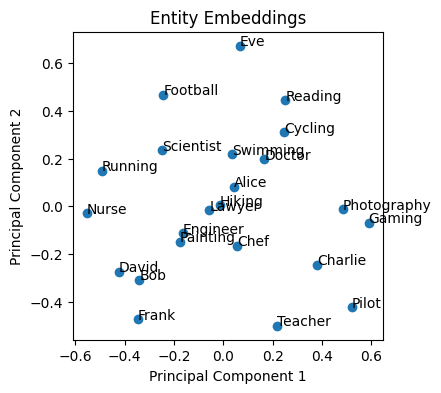

In [158]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(4,4)
from sklearn.decomposition import PCA

# Get the entity embeddings
# entity_embeddings = model.entity_embeddings(indices=None).detach().numpy()
entity_embeddings = model.entity_representations[0](indices=None).detach().numpy()

# Perform PCA
pca = PCA(n_components=2)
entity_embeddings_pca = pca.fit_transform(entity_embeddings)

# Plot the embeddings
# plt.figure(figsize=(10, 10))
plt.scatter(entity_embeddings_pca[:, 0], entity_embeddings_pca[:, 1])
for i, entity in enumerate(triples_factory.entity_id_to_label):
    plt.annotate(id_to_entity[entity], (entity_embeddings_pca[i, 0], entity_embeddings_pca[i, 1]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Entity Embeddings')
plt.show()

In [159]:
# Get the relation embeddings
relation_embeddings = model.relation_representations[0](indices=None).detach().numpy()

# Perform PCA
relation_embeddings_pca = pca.transform(relation_embeddings)

# Get the relation names
relation_labels = model.triples_factory.get_relation_labels()

# Plot the embeddings with relation names
plt.figure(figsize=(10, 10))
plt.scatter(relation_embeddings_pca[:, 0], relation_embeddings_pca[:, 1])
for i, relation in enumerate(relation_labels):
    plt.annotate(relation, (relation_embeddings_pca[i, 0], relation_embeddings_pca[i, 1]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Relation Embeddings')
plt.show()

AttributeError: 'TransE' object has no attribute 'triples_factory'

In [34]:
# Get the entity names
entity_labels = model.triples_factory.get_entity_labels()

# Plot the embeddings with entity names
plt.figure(figsize=(10, 10))
plt.scatter(entity_embeddings_pca[:, 0], entity_embeddings_pca[:, 1])
for i, entity in enumerate(entity_labels):
    plt.annotate(entity, (entity_embeddings_pca[i, 0], entity_embeddings_pca[i, 1]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Entity Embeddings')
plt.show()

AttributeError: 'TransE' object has no attribute 'triples_factory'

In [36]:
# Get the entity names
entity_labels = result.training.triples_factory.get_entity_labels()

# Plot the embeddings with entity names
plt.figure(figsize=(10, 10))
plt.scatter(entity_embeddings_pca[:, 0], entity_embeddings_pca[:, 1])
for i, entity in enumerate(entity_labels):
    plt.annotate(entity, (entity_embeddings_pca[i, 0], entity_embeddings_pca[i, 1]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Entity Embeddings')
plt.show()

AttributeError: 'function' object has no attribute 'run'

In [37]:
result

PipelineResult(random_seed=1888509045, model=TransE(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(8, 50)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(3, 50)
    )
  )
  (weight_regularizers): ModuleList()
), training=TriplesFactory(num_entities=8, num_relations=3, create_inverse_triples=False, num_triples=8), training_loop=<pykeen.training.slcwa.SLCWATrainingLoop object at 0x7f834cac8670>, losses=[1.4124407768249512, 1.8501150608062744, 1.4816471338272095, 1.7063754796981812, 1.7398403882980347], metric_results=<pykeen.evaluation.rank_based_evaluator.RankBasedMetricResults object at 0x7f83fb23f970>, train_seconds=0.7798233032226562, evaluate_seconds=0.044973134994506836, stopper=<pykeen.stoppers.stopper.NopStopper object at 0x7f83f91f3a60>, configuration={'dataset': '<user defined>',